In [6]:

import json
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter


[nltk_data] Downloading package stopwords to C:\Users\David
[nltk_data]     Aristizabal E\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Device set to use cpu


                                           comentario sentimiento
0   Me encantó la atención, el doctor fue muy amab...    positivo
1   El consultorio estaba limpio, pero tuve que es...      neutro
2   El tratamiento fue doloroso y no me explicaron...    negativo
3   Excelente servicio, resolvieron todas mis duda...    positivo
4   No me gustó el trato de la recepcionista, fue ...    negativo
5   Los precios son accesibles y la calidad del tr...    positivo
6   Salí muy contento con mi limpieza dental, volv...    positivo
7   Me dieron una cita muy rápido, aunque la consu...      neutro
8   No recomiendo este lugar, tuve complicaciones ...    negativo
9   Todo bien, pero creo que podrían mejorar el ti...    positivo
10  El doctor me inspiró mucha confianza y el resu...    positivo
11  Siento que el procedimiento fue muy costoso pa...    negativo
12  La odontóloga fue muy paciente con mis hijos, ...    positivo
13  El lugar está bien ubicado, pero no tienen par...      neutro
14  Mi exp

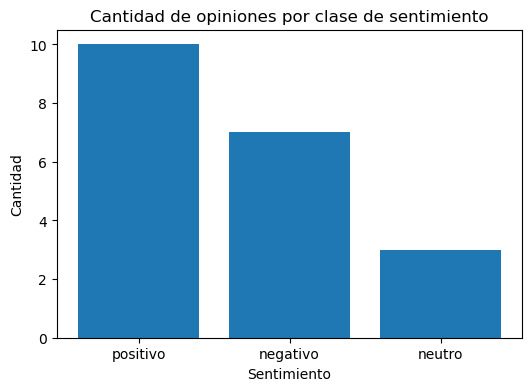

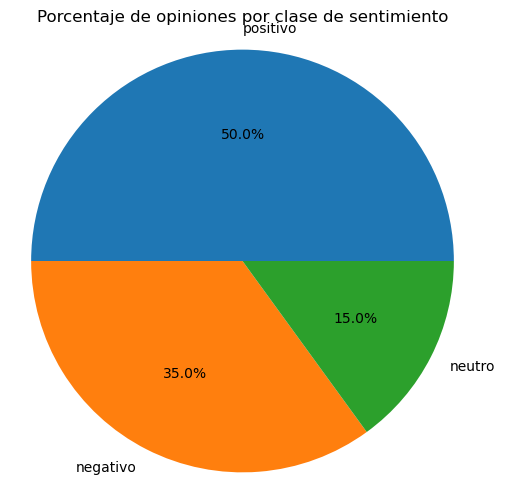

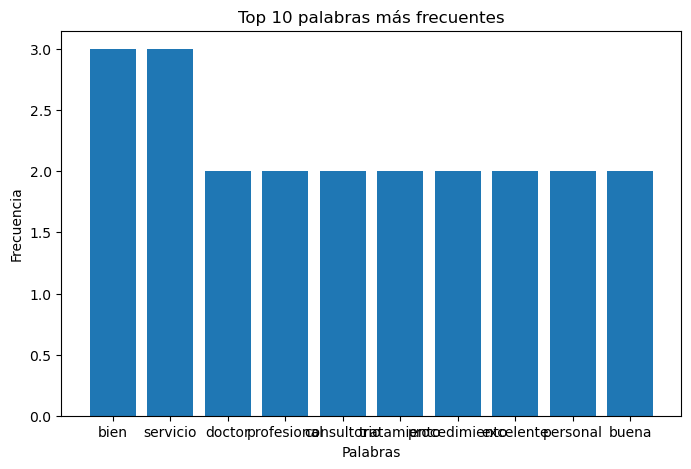

In [7]:

# Para Hugging Face
from transformers import pipeline
# Lee el archivo json con los comentarios
with open('comentarios.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

df = pd.DataFrame(data)

# Crea la pipeline
classifier = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

def clasifica_sentimiento(text):
    res = classifier(text)[0]
    label = res['label']
    # Mapea el resultado de 1-2 estrellas = Negativo, 3 = Neutro, 4-5 = Positivo
    if label in ['1 star', '2 stars']:
        return 'negativo'
    elif label == '3 stars':
        return 'neutro'
    else:
        return 'positivo'

df['sentimiento'] = df['comentario'].apply(clasifica_sentimiento)
print(df[['comentario', 'sentimiento']])

# Conteo y gráfica
import matplotlib.pyplot as plt

conteo = df['sentimiento'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(conteo.index, conteo.values)
plt.title('Cantidad de opiniones por clase de sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad')
plt.show()

# Gráfico de pastel
plt.figure(figsize=(6,6))
plt.pie(conteo, labels=conteo.index, autopct='%1.1f%%')
plt.title('Porcentaje de opiniones por clase de sentimiento')
plt.axis('equal')
plt.show()



# --------- TOP 10 PALABRAS MÁS FRECUENTES (ELIMINANDO STOPWORDS) ---------


# Une todos los comentarios
all_text = ' '.join(df['comentario'].tolist())
# Tokeniza y limpia
words = [word.lower() for word in all_text.split()]
words = [word.strip('.,;:¡!¿?"') for word in words]
spanish_stopwords = set(stopwords.words('spanish'))
filtered_words = [word for word in words if word not in spanish_stopwords and len(word) > 2]
# Cuenta palabras
word_counts = Counter(filtered_words)
top_10 = word_counts.most_common(10)

# Desempaqueta palabras y conteos
top_words, top_counts = zip(*top_10)

# Gráfico de barras
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.bar(top_words, top_counts)
plt.title('Top 10 palabras más frecuentes')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.show()


In [13]:
# Pipeline de resumen (modelo genérico inglés)
from transformers import pipeline
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Función para procesar comentario nuevo
def analizar_comentario(texto):
    sentimiento = clasifica_sentimiento(texto)
    resumen = summarizer(texto[:1024], max_length=40, min_length=10, do_sample=False)[0]['summary_text']
    
    print(f"Comentario ingresado: {texto}")
    print(f"➡️ Sentimiento: {sentimiento}")
    print(f"📝 Resumen: {resumen}")
    

Device set to use cpu


In [14]:
nuevo = "Las arepas estaban ricas."
analizar_comentario(nuevo)


Your max_length is set to 40, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


Comentario ingresado: Las arepas estaban ricas.
➡️ Sentimiento: positivo
📝 Resumen: Las arepas estaban ricas. Las arepas están afectadas. Las ricas no son ricas, las arepas arepas no arepas.
